In [ ]:
# --------------------------------------------------------------
# 1. Importação de Bibliotecas
# --------------------------------------------------------------
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Adiciona a pasta raiz do projeto ao path (antes das importações locais)
sys.path.append(os.path.abspath('../'))

from scipy import stats
from src.data_preparation import load_data
from src.eda_utils import missing_summary, correlation_heatmap, detect_outliers_iqr


# Configurações de estilo
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.titlesize"] = 14

# --------------------------------------------------------------
# 2. Carregamento dos Dados
# --------------------------------------------------------------
df = load_data('../data/raw/delivery_time.csv')
df.head()

# --------------------------------------------------------------
# 3. Visão Geral do Dataset
# --------------------------------------------------------------
print("Dimensões:", df.shape)
print("\nTipos de Dados:\n", df.dtypes)
print("\nEstatísticas Descritivas:")
display(df.describe())

numeric_vars = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\nVariáveis Numéricas:", numeric_vars)
print("Variáveis Categóricas:", categorical_vars)

# --------------------------------------------------------------
# 4. Análise de Valores Faltantes
# --------------------------------------------------------------
missing_summary(df)

# --------------------------------------------------------------
# 5. Análise da Variável Alvo: delivery_time
# --------------------------------------------------------------
target = 'delivery_time_hours'

sns.histplot(df[target], kde=True, color='dodgerblue')
plt.title("Distribuição do Tempo de Entrega")
plt.xlabel("Tempo de Entrega (minutos)")
plt.show()

sns.boxplot(x=df[target], color='orange')
plt.title("Boxplot - Tempo de Entrega")
plt.show()

print("\nEstatísticas Descritivas da Variável Alvo:")
display(df[target].describe())

# Teste de normalidade
shapiro_test = stats.shapiro(df[target].dropna())
print("\nShapiro-Wilk Test:", shapiro_test)
print("Distribuição é normal?", "Sim ✅" if shapiro_test.pvalue > 0.05 else "Não ❌")

# --------------------------------------------------------------
# 6. Análise Univariada - Variáveis Numéricas
# --------------------------------------------------------------
for col in numeric_vars:
    if col != target:
        print(f"\n🔹 {col}")
        display(df[col].describe())
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f"Distribuição de {col}")
        plt.show()
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot de {col}")
        plt.show()
        detect_outliers_iqr(df, col)

# --------------------------------------------------------------
# 7. Análise Univariada - Variáveis Categóricas
# --------------------------------------------------------------
for col in categorical_vars:
    print(f"\n {col}")
    print(df[col].value_counts())
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Distribuição de {col}")
    plt.xticks(rotation=45)
    plt.show()

# --------------------------------------------------------------
# 8. Análise de Correlações
# --------------------------------------------------------------
correlation_heatmap(df, target=target)

# --------------------------------------------------------------
# 9. Análise Bivariada (Categóricas vs Target)
# --------------------------------------------------------------
for col in categorical_vars:
    sns.boxplot(x=col, y=target, data=df, palette='Set3')
    plt.title(f"{target} por {col}")
    plt.xticks(rotation=45)
    plt.show()

# --------------------------------------------------------------
# 10. Identificação de Outliers
# --------------------------------------------------------------
for col in numeric_vars:
    detect_outliers_iqr(df, col)

# --------------------------------------------------------------
# 11. Conclusões e Descobertas
# --------------------------------------------------------------
print("\nResumo das Análises Realizadas:")

print(f"""
Principais Descobertas:
- Tamanho do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas
- Variáveis numéricas: {len(numeric_vars)}
- Variáveis categóricas: {len(categorical_vars)}
- Valores faltantes: analisados
- Outliers: identificados, mas não tratados
- Variável alvo 'delivery_time' analisada quanto à normalidade e dispersão
""")



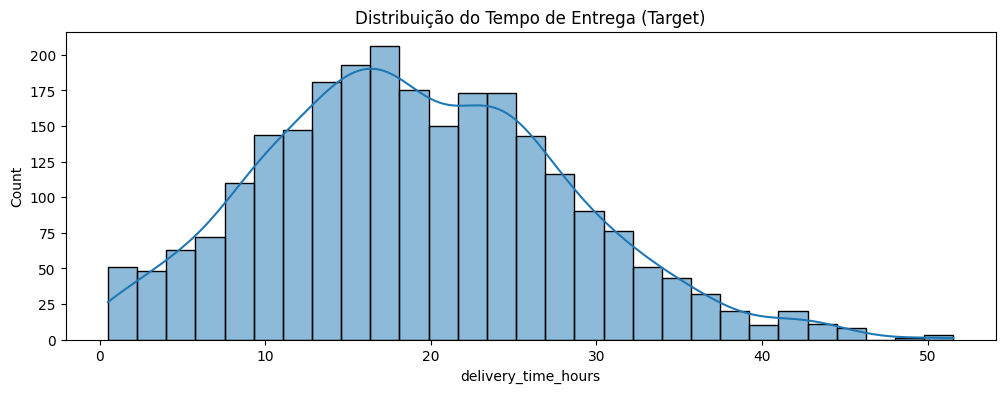

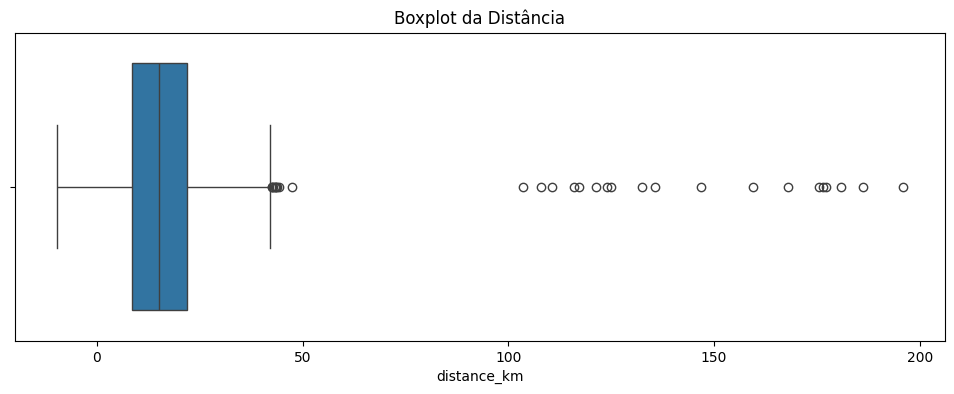

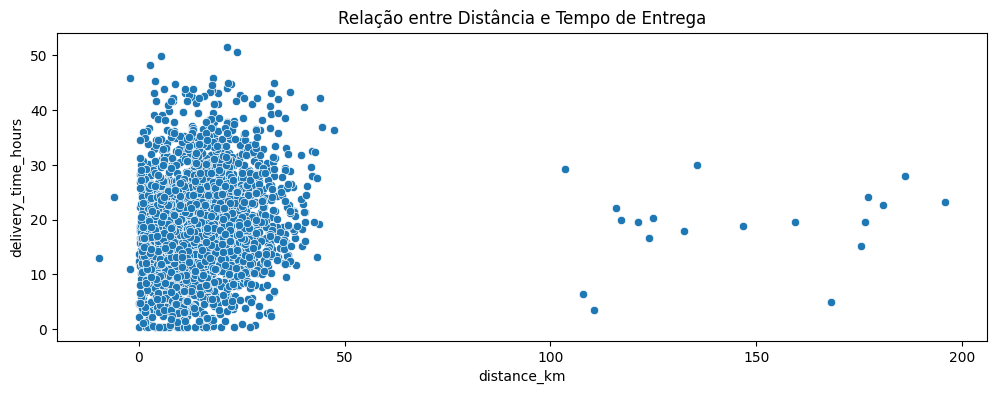

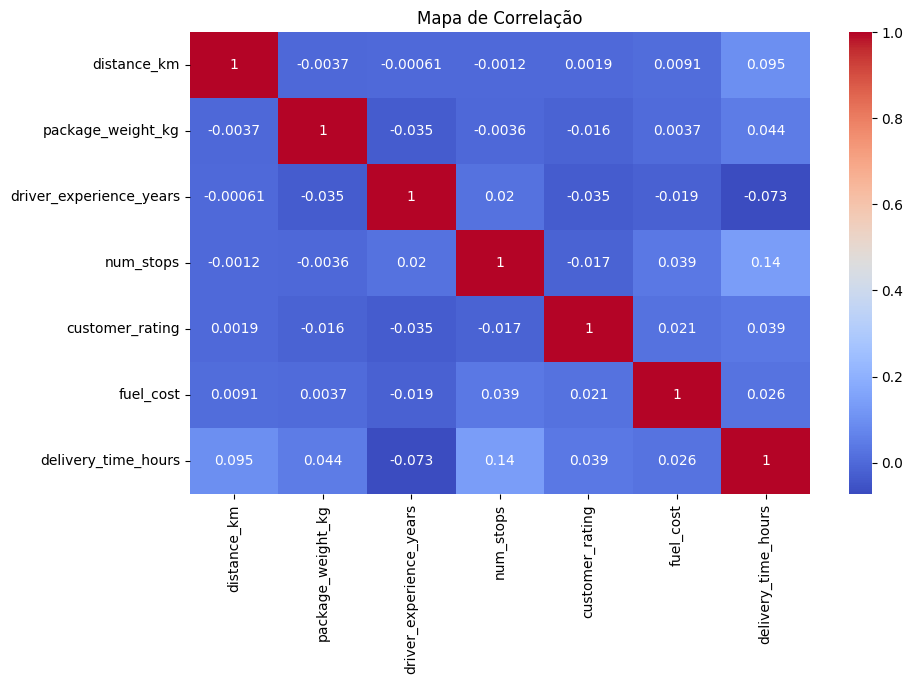

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def show_basic_info(df):
    """Mostra informações gerais e valores nulos"""
    print("Dimensões do dataset:", df.shape)
    print("\nValores nulos por coluna:\n", df.isnull().sum())
    print("\nTipos de dados:\n", df.dtypes)


def plot_top_graphs(df, target='delivery_time_hours'):
    """Gera apenas 4 gráficos principais e bem escolhidos"""

    plt.figure(figsize=(12, 4))
    sns.histplot(df[target], kde=True)
    plt.title("Distribuição do Tempo de Entrega (Target)")
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df['distance_km'])
    plt.title("Boxplot da Distância")
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.scatterplot(x='distance_km', y=target, data=df)
    plt.title("Relação entre Distância e Tempo de Entrega")
    plt.show()

    plt.figure(figsize=(10, 6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Mapa de Correlação")
    plt.show()

df = pd.read_csv('../data/raw/delivery_time.csv')
plot_top_graphs(df)

